In [3]:
"""
IMPORTS
"""
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import folium 
from folium import plugins
import ipywidgets
import geocoder
import geopy
import numpy as np
from vega_datasets import data as vds
from branca.element import Figure
import re
from datetime import datetime


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

### 1.- Obtención de los datos

La fuente principal de todos los datos obtenidos ha sido a través de las páginas del ayuntamiento de Madrid (MUNIMADRID y PORTAL DE DATOS ABIERTOS DEL AYUNTAMIENTO DE MADRID)

In [ ]:
# guarda en variables los datasets y su fuente

# df_demandas = pd.DataFrame()
# URL_demandas_de_servicio="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=40ab4e8b0327d610VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
# Solicitudes de procesos solicitados por los usuarios

# df_urgencias = pd.DataFrame()
# URL_urgencias_atendidas="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=0b006dace9578610VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
# URGENCIAS ATENDIDAS EN LOS CENTROS. ESTAS URGENCIAS SON DE LA SIGUIENTES TIPOLOGIAS 
# Malos tratos                                      --      Código: 10
# Abandono                                          --      Código: 20
# Alojamiento/Vivienda                              --      Código: 30
# Desprotección social problema salud               --      Código: 40
# Desprotección socio-familiar                      --      Código: 50

# df_centros_sociales = pd.DataFrame()
# URL_centros_sociales="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=7c123e08dafc8410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
# Listado con geoposicionamiento de los diferentes centros sociales que se encuentran en Madrid, tanto del ayuntamiento como otros que no son del ayuntamiento (por ejemplo el Centro de Atención Social del "Casino de la Reina").


# OTROS POSIBLES DF QUE PUDIERA NECESITAR:
#URL_datos_abiertos_madrid="https://datos.madrid.es/portal/site/egob/menuitem.9e1e2f6404558187cf35cf3584f1a5a0/?vgnextoid=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
#URL_ayudas_sociales="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=00937b777f8ea610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
#URL_ranking_vulnerabilidad="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=d029ed1e80d38610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"


### 2.- Extraccion de datos de los diferentes Datasets y almacenamiento en nuevo fichero situado en data\Outcomes

Vamos a tomar los datos de los años desde el 2018 al 2021, ya que los datos a día de hoy de 2022 están actualizados solo hasta abril, por lo que podría provocar errores en la preparación de los módelos.

En este DataFrame se observa  que hay bastantes datos nulos, que no han sido rellenados.

Los datos son los de 'tramo de edad', 'sexo' y 'nacionalidad' (española/extranjera), que hay que ir rellenando.

Tomaré como referencia en función de cada distrito los datos de otros Datasets disponibles para ajustar estos datos.

### 3.- Featuring Engineering

Vamos a agrupar las __fechas de edades__ para tener un rango más manejable.

Así agruparemos < 18 años a todos los grupos que sean inferiores a esta edad.

Agruparemos >65 a todos los grupos que sean superiores a esta edad.

Agruparemos de 10 en días años al resto.

In [5]:
df_urgencias_corregido= pd.read_csv("E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Outcomes\df_urgencias_corregido.csv",sep=',')
df_urgencias_corregido

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita
0,83,CSS Zaida,11,CARABANCHEL,25 - 29,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021
1,83,CSS Zaida,11,CARABANCHEL,30 - 34,Española,M,1,Primera Atención,30.0,Alojamiento/Vivienda,04/01/2021
2,74,CSS Santa Hortensia,5,CHAMARTÍN,70 - 74,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021
3,91,CSS Luis Vives,15,CIUDAD LINEAL,25 - 29,Extranjera,H,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021
4,80,CSS Gallur,10,LATINA,>= 85,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021
...,...,...,...,...,...,...,...,...,...,...,...,...
37901,98,CSS Pablo Casals,20,SAN BLAS-CANILLEJAS,30 - 34,Española,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018
37902,85,CSS Loyola de Palacio,12,USERA,>= 85,Española,M,2,Zona / Historia Social,40.0,Desproteccion social problema salud,28/12/2018
37903,84,CSS San Filiberto,12,USERA,35 - 39,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018
37904,84,CSS San Filiberto,12,USERA,65 - 69,Española,H,1,Primera Atención,30.0,Alojamiento/Vivienda,28/12/2018


In [6]:
df_urgencias_corregido['Tramo Edad'].value_counts()

>= 85      5204
40 - 44    4162
35 - 39    4092
30 - 34    3581
45- 49     3148
50 - 54    2732
25 - 29    2611
80 - 84    2407
55 - 59    1952
18 - 24    1810
75 - 79    1678
60 - 64    1634
70 - 74    1392
65 - 69    1217
12 - 17     123
             74
4 - 11       65
0 - 3        24
Name: Tramo Edad, dtype: int64

Vemos que hay __70 registros en blanco__ que no hemos sustituido anteriormente.

Vamos a proceder a reemplazarlos por el registro anterior, ya que no afectará mucho a las previsiones del módelo.

In [7]:
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].mask(df_urgencias_corregido['Tramo Edad'] == ' ')
df_urgencias_corregido.fillna(method='ffill',inplace=True)

Hay que eliminar los espacios en blanco entre -

In [8]:
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace(' - ','-')
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace('- ','-')
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace('= ','=')

In [9]:
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A4-11", "<=18")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A12-17", "<=18")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A0-3", "<=18") 

df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A18-24", "19-29")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A25-29", "19-29")

df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A30-34", "30-39")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A35-39", "30-39")

df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A40-44", "40-49")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A44-49", "40-49")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A45-49", "40-49")

df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A50-54", "50-59")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A55-59", "50-59")

df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A60-64", "60-64")

df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A65-69", ">=65")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A75-79", ">=65")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A80-84", ">=65")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A70-74", ">=65")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A>=85", ">=65")

#df_demandas


c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6

In [10]:
df_urgencias_corregido['Tramo Edad'].unique()

array(['19-29', '30-39', '>=65', '40-49', '50-59', '<=18', '60-64'],
      dtype=object)

In [11]:
'''Verificamos que ya no hay valores nulos'''
print(df_urgencias_corregido['Tramo Edad'].value_counts())
print("Los valores nulos que hay actualmente en este DataFrame son: ",df_urgencias_corregido['Tramo Edad'].isnull().sum())

>=65     11918
30-39     7691
40-49     7326
50-59     4692
19-29     4430
60-64     1637
<=18       212
Name: Tramo Edad, dtype: int64
Los valores nulos que hay actualmente en este DataFrame son:  0


In [12]:
df_urgencias_corregido

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita
0,83,CSS Zaida,11,CARABANCHEL,19-29,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021
1,83,CSS Zaida,11,CARABANCHEL,30-39,Española,M,1,Primera Atención,30.0,Alojamiento/Vivienda,04/01/2021
2,74,CSS Santa Hortensia,5,CHAMARTÍN,>=65,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021
3,91,CSS Luis Vives,15,CIUDAD LINEAL,19-29,Extranjera,H,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021
4,80,CSS Gallur,10,LATINA,>=65,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021
...,...,...,...,...,...,...,...,...,...,...,...,...
37901,98,CSS Pablo Casals,20,SAN BLAS-CANILLEJAS,30-39,Española,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018
37902,85,CSS Loyola de Palacio,12,USERA,>=65,Española,M,2,Zona / Historia Social,40.0,Desproteccion social problema salud,28/12/2018
37903,84,CSS San Filiberto,12,USERA,30-39,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018
37904,84,CSS San Filiberto,12,USERA,>=65,Española,H,1,Primera Atención,30.0,Alojamiento/Vivienda,28/12/2018


In [13]:
lista_rango_edad=df_urgencias_corregido['Tramo Edad'].unique()                  # Hay que revisar esto, porque no está ordenado y sería lo ideal
lista_rango_edad.sort()
mivalor = [ x for x in range(len(lista_rango_edad))]             ##  agregaremos una variable numérica para sustituir a los nombres de las cias
mivalor
lista_rango_edad=list(lista_rango_edad)                               ##  dejamos el valor cero por si en los datos a testear  hay algún NaN y 

Age_range_code = {k: v for k, v in zip(lista_rango_edad, mivalor)}   ##  sustituirlo por cero
Age_range_code
df_urgencias_corregido['Age_range_code']= df_urgencias_corregido['Tramo Edad'].map(Age_range_code)


In [14]:
df_urgencias_corregido

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita,Age_range_code
0,83,CSS Zaida,11,CARABANCHEL,19-29,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021,0
1,83,CSS Zaida,11,CARABANCHEL,30-39,Española,M,1,Primera Atención,30.0,Alojamiento/Vivienda,04/01/2021,1
2,74,CSS Santa Hortensia,5,CHAMARTÍN,>=65,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021,6
3,91,CSS Luis Vives,15,CIUDAD LINEAL,19-29,Extranjera,H,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021,0
4,80,CSS Gallur,10,LATINA,>=65,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37901,98,CSS Pablo Casals,20,SAN BLAS-CANILLEJAS,30-39,Española,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018,1
37902,85,CSS Loyola de Palacio,12,USERA,>=65,Española,M,2,Zona / Historia Social,40.0,Desproteccion social problema salud,28/12/2018,6
37903,84,CSS San Filiberto,12,USERA,30-39,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018,1
37904,84,CSS San Filiberto,12,USERA,>=65,Española,H,1,Primera Atención,30.0,Alojamiento/Vivienda,28/12/2018,6


Los valores son: {19-29: 0, 30-39: 1, 40-49: 2, 50-59: 3, 60-64: 4, <=18: 5, >=65: 6}

Vamos a dar un formato numérico a la __nacionalidad__ del usuario, siendo los valores: 

0 para Española, 1 para Extranjera

In [15]:
lista_nacionalidad=df_urgencias_corregido['Nacionalidad'].unique()
lista_nacionalidad.sort()
lista_nacionalidad
mivalor = [ x for x in range(len(lista_nacionalidad))]             ##  agregaremos una variable numérica para sustituir a los nombres de las cias
#mivalor    
lista_nacionalidad=list(lista_nacionalidad)                               ##  dejamos el valor cero por si en los datos a testear  hay algún NaN y 
Nationality_code = {k: v for k, v in zip(lista_nacionalidad, mivalor)}   ##  sustituirlo por cero
df_urgencias_corregido['Nationality_code']=df_urgencias_corregido['Nacionalidad'].map(Nationality_code)
df_urgencias_corregido

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita,Age_range_code,Nationality_code
0,83,CSS Zaida,11,CARABANCHEL,19-29,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021,0,2
1,83,CSS Zaida,11,CARABANCHEL,30-39,Española,M,1,Primera Atención,30.0,Alojamiento/Vivienda,04/01/2021,1,1
2,74,CSS Santa Hortensia,5,CHAMARTÍN,>=65,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021,6,1
3,91,CSS Luis Vives,15,CIUDAD LINEAL,19-29,Extranjera,H,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021,0,2
4,80,CSS Gallur,10,LATINA,>=65,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37901,98,CSS Pablo Casals,20,SAN BLAS-CANILLEJAS,30-39,Española,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018,1,1
37902,85,CSS Loyola de Palacio,12,USERA,>=65,Española,M,2,Zona / Historia Social,40.0,Desproteccion social problema salud,28/12/2018,6,1
37903,84,CSS San Filiberto,12,USERA,30-39,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018,1,2
37904,84,CSS San Filiberto,12,USERA,>=65,Española,H,1,Primera Atención,30.0,Alojamiento/Vivienda,28/12/2018,6,1


In [16]:
df_urgencias_corregido['Sexo'].value_counts()             #Solo hay 1 dato vacio en el DataFrame por lo que lo sustituiremos por M, que es la moda

M    26565
H    11339
         2
Name: Sexo, dtype: int64

In [17]:
df_urgencias_corregido['Sexo']=df_urgencias_corregido['Sexo'].mask(df_urgencias_corregido['Sexo'] == ' ').fillna('M')

Vamos a dar un formato numérico al __sexo__ del usuario, siendo los valores: 

0 para H, 1 para M

In [18]:
lista_sexo=df_urgencias_corregido['Sexo'].unique()
lista_sexo.sort()
lista_sexo
mivalor = [ x for x in range(len(lista_sexo))]             ##  agregaremos una variable numérica para sustituir a los nombres de las cias
#mivalor    
lista_sexo=list(lista_sexo)                               ##  dejamos el valor cero por si en los datos a testear  hay algún NaN y 

Sex_code = {k: v for k, v in zip(lista_sexo, mivalor)}   ##  sustituirlo por cero

df_urgencias_corregido['Sex_code']= df_urgencias_corregido['Sexo'].map(Sex_code)
df_urgencias_corregido

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita,Age_range_code,Nationality_code,Sex_code
0,83,CSS Zaida,11,CARABANCHEL,19-29,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021,0,2,1
1,83,CSS Zaida,11,CARABANCHEL,30-39,Española,M,1,Primera Atención,30.0,Alojamiento/Vivienda,04/01/2021,1,1,1
2,74,CSS Santa Hortensia,5,CHAMARTÍN,>=65,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021,6,1,1
3,91,CSS Luis Vives,15,CIUDAD LINEAL,19-29,Extranjera,H,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021,0,2,0
4,80,CSS Gallur,10,LATINA,>=65,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37901,98,CSS Pablo Casals,20,SAN BLAS-CANILLEJAS,30-39,Española,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018,1,1,1
37902,85,CSS Loyola de Palacio,12,USERA,>=65,Española,M,2,Zona / Historia Social,40.0,Desproteccion social problema salud,28/12/2018,6,1,1
37903,84,CSS San Filiberto,12,USERA,30-39,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018,1,2,1
37904,84,CSS San Filiberto,12,USERA,>=65,Española,H,1,Primera Atención,30.0,Alojamiento/Vivienda,28/12/2018,6,1,0


In [19]:
df_urgencias_corregido['Tipo Supuesto Urgente'].unique()          #   Vemos que hay valores nulos en el campo a valorar, por lo que vamos a ver cuantos son y ver la posibilidad de sustituirlos por otros.
                                                        #   Esto lo haremos en cada Dataset descargado para así que sea más "asumible" la tarea

array(['Alojamiento/Vivienda', 'Desproteccion social problema salud',
       'Desprotección socio-familiar', 'Malos Tratos', 'Abandono'],
      dtype=object)

In [20]:
df_urgencias_corregido['Tipo Supuesto Urgente'].value_counts()

Desprotección socio-familiar           19187
Desproteccion social problema salud    10348
Alojamiento/Vivienda                    7331
Malos Tratos                             957
Abandono                                  83
Name: Tipo Supuesto Urgente, dtype: int64

Vamos a dar un formato de fecha año y trimestre a los valores de 'Fecha Demanda' para poder ver qué evolución tienen los datos en el tiempo

In [21]:
df_urgencias_corregido['Fecha Cita'] = pd.to_datetime(df_urgencias_corregido['Fecha Cita'], dayfirst=True)

df_urgencias_corregido['year'] = df_urgencias_corregido['Fecha Cita'].dt.year
#df_demandas['month'] = df_demandas['Timestamp'].dt.month
df_urgencias_corregido['Quarteryear'] = df_urgencias_corregido['Fecha Cita'].dt.quarter
df_urgencias_corregido


,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita,Age_range_code,Nationality_code,Sex_code,year,Quarteryear
0,83,CSS Zaida,11,CARABANCHEL,19-29,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,2021-01-04,0,2,1,2021,1
1,83,CSS Zaida,11,CARABANCHEL,30-39,Española,M,1,Primera Atención,30.0,Alojamiento/Vivienda,2021-01-04,1,1,1,2021,1
2,74,CSS Santa Hortensia,5,CHAMARTÍN,>=65,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,2021-01-04,6,1,1,2021,1
3,91,CSS Luis Vives,15,CIUDAD LINEAL,19-29,Extranjera,H,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,2021-01-04,0,2,0,2021,1
4,80,CSS Gallur,10,LATINA,>=65,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,2021-01-04,6,1,1,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37901,98,CSS Pablo Casals,20,SAN BLAS-CANILLEJAS,30-39,Española,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,2018-12-28,1,1,1,2018,4
37902,85,CSS Loyola de Palacio,12,USERA,>=65,Española,M,2,Zona / Historia Social,40.0,Desproteccion social problema salud,2018-12-28,6,1,1,2018,4
37903,84,CSS San Filiberto,12,USERA,30-39,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,2018-12-28,1,2,1,2018,4
37904,84,CSS San Filiberto,12,USERA,>=65,Española,H,1,Primera Atención,30.0,Alojamiento/Vivienda,2018-12-28,6,1,0,2018,4


In [22]:
df_urgencias_corregido_prueba=df_urgencias_corregido.drop(['Código Centro'],axis=1)

In [23]:
col = df_urgencias_corregido_prueba.pop('Código Tipo Supuesto Urgente')
df_urgencias_corregido_prueba.insert(loc= 0 , column= 'Código Tipo Supuesto Urgente', value= col)

In [24]:
df_urgencias_corregido_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37906 entries, 0 to 37905
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Código Tipo Supuesto Urgente  37906 non-null  float64       
 1   Centro                        37906 non-null  object        
 2   Código Distrito Centro        37906 non-null  int64         
 3   Distrito Centro               37906 non-null  object        
 4   Tramo Edad                    37906 non-null  object        
 5   Nacionalidad                  37906 non-null  object        
 6   Sexo                          37906 non-null  object        
 7   Código Tipo Atención          37906 non-null  int64         
 8   Tipo Atención                 37906 non-null  object        
 9   Tipo Supuesto Urgente         37906 non-null  object        
 10  Fecha Cita                    37906 non-null  datetime64[ns]
 11  Age_range_code              

In [25]:
df_urgencias_corregido_prueba.to_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Outcomes\df_urgencias_corregido_prueba.csv',header=True,index=False)

### 4.- Exploring Graphics

Vamos a hacer unas gráficas para valorar los datos que disponemos.

Más gráficas en __Tableau__

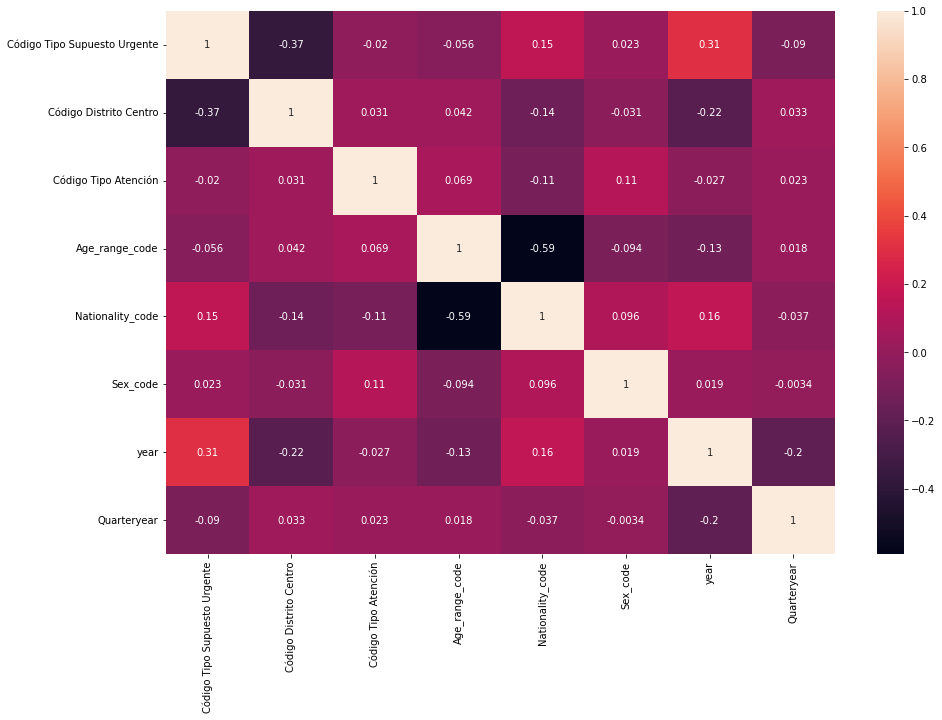

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df_urgencias_corregido_prueba.corr(), annot=True);

Se observa que hay cierta correlación entre los parámetros de **year**, **Nationality_code**,**Código Distrito Centro**.

También se observa que no hay aparente correlación con los parámetros **Código Tipo Atención**,**Age_range_code** y **Sex_code**.

**year** también parece tener correlación con otros parámetros como **Nationality_code** o **Código Distrito centro**.

**Nationality code** y **Age_range_code** parece que también tiene una cierta correlación.


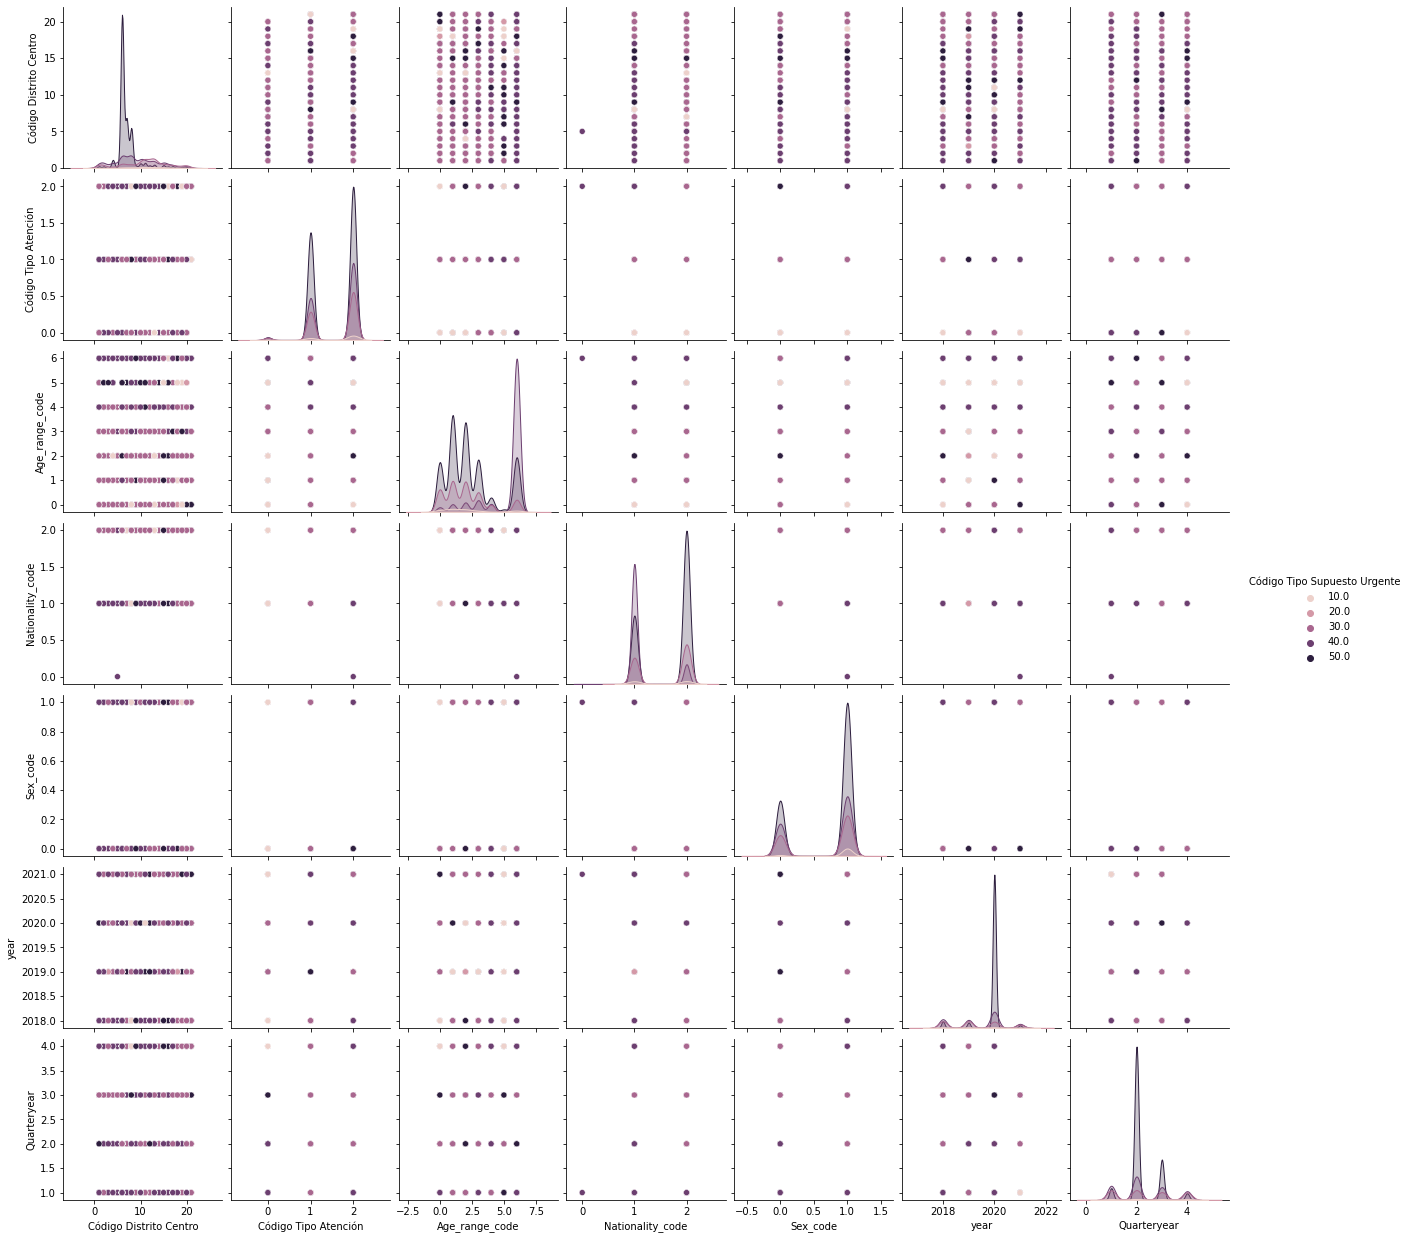

In [28]:
sns.pairplot(df_urgencias_corregido_prueba,hue='Código Tipo Supuesto Urgente');

En este **pairplot** se ve claramente que los valores no son continuos, sino discretos.

Hay que tener esto en cuenta a la hora de realizar cualquier análisis y predicción, ya que habrá que hacer __clasificación__.

<Figure size 1080x720 with 0 Axes>

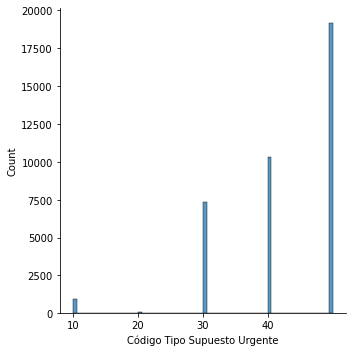

In [29]:
plt.figure(figsize=(15,10))
sns.displot(df_urgencias_corregido_prueba['Código Tipo Supuesto Urgente'])
plt.xticks(np.arange(10,50,step=10));

### 5.- My first Model (linearRegression)

In [159]:
df_urgencias_corregido['Código Tipo Supuesto Urgente']=df_urgencias_corregido['Código Tipo Supuesto Urgente'].mask(df_urgencias_corregido['Código Tipo Supuesto Urgente'] == ' ').fillna(0)
#   He añadido este codigo para ver si conseguia hacer que funcionará el modelo, al haber NaN en y

In [160]:
X=df_urgencias_corregido_prueba[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code','year']]
y=df_urgencias_corregido_prueba['Código Tipo Supuesto Urgente']

In [161]:

lin_reg = LinearRegression()   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
lin_reg.fit(X_train, y_train)                           #   Entrenas/generas el modelo para determinar los coeficientes

print("Estos son los datos del test y del target:\n-----")
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)  

#    print("Estos son los datos del valor de y en x=0 y de las pendientes de cada gradiente de las variables:\n-----")
#    print(lin_reg.intercept_)
#    print(lin_reg.coef_)
coeff_df = pd.DataFrame(lin_reg.coef_,
                            X.columns,
                            columns=['Coefficient'])
print("-----\nEstos son las pendientes de cada gradiente visto en un Dataframe:")
print(coeff_df)

predictions = lin_reg.predict(X_test)                   #   Determino los resultados que deberían de dar con los valores guardados para
print("-----\nEl factor de correlacion de la regresión es: ",lin_reg.score(X_test, y_test))
print("-----\nErrores de las predicciones:")
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("-----\nErrores de los tests:")
print('MAE:', metrics.mean_absolute_error(y_train, lin_reg.predict(X_train)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_train, lin_reg.predict(X_train)))
print('MSE:', metrics.mean_squared_error(y_train, lin_reg.predict(X_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_train))))

print("Esta es la importancia de las variables:\n-----")
features = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['coefficient'])
print(features.head().sort_values('coefficient', ascending=False))

Estos son los datos del test y del target:
-----
Total features shape: (35280, 5)
Train features shape: (26460, 5)
Train target shape: (26460,)
Test features shape: (8820, 5)
Test target shape: (8820,)
-----
Estos son las pendientes de cada gradiente visto en un Dataframe:
                        Coefficient
Código Distrito Centro    -0.541971
Age_range_code             0.210813
Nationality_code           1.343465
Sex_code                   0.082454
year                       4.678303
-----
El factor de correlacion de la regresión es:  0.26668074039727363
-----
Errores de las predicciones:
MAE: 5.99717022937175
MAPE: 0.2011875027068439
MSE: 62.098182540539625
RMSE: 7.880240005262507
-----
Errores de los tests:
MAE: 5.971734199936894
MAPE: 0.20129792725610385
MSE: 61.768173177028864
RMSE: 7.859273069249399
Esta es la importancia de las variables:
-----
                        coefficient
year                       4.678303
Nationality_code           1.343465
Age_range_code             0

Se observa en los datos que, efectivamente, un **módelo de regresión lineal** no es válido para este tipo de predicciones, ya que el coeficiente de correlación de la regresión es 0.268.